In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Dataset read and inspection


In [77]:
ortho2C_dataset = pd.read_csv("/content/column_2C_weka.csv")
ortho2C_dataset.rename(columns={"pelvic_tilt numeric": "pelvic_tilt"}, inplace=True)
ortho2C_dataset.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [78]:
ortho2C_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [79]:
ortho2C_dataset.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [80]:
class_corr = ortho2C_dataset.iloc[:,:6].corr()
class_corr

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
pelvic_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


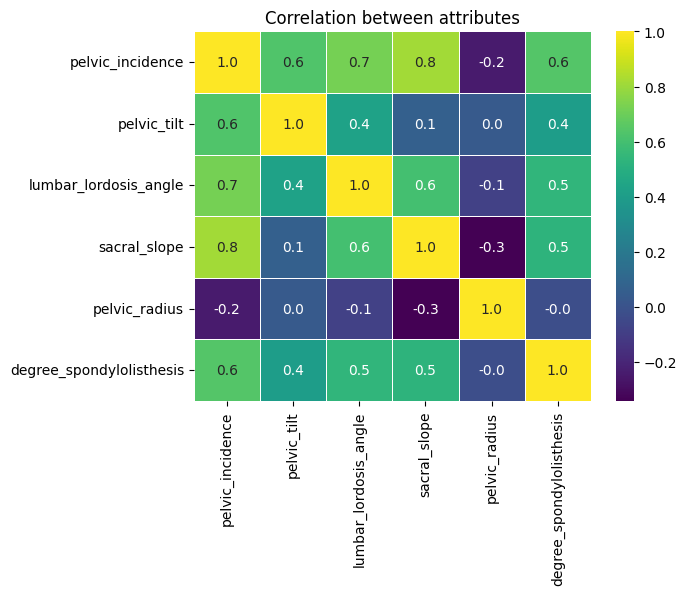

In [81]:
sns.heatmap(class_corr, annot=True, linewidths=0.7, fmt='.1f', cmap='viridis')
plt.title('Correlation between attributes')
plt.show()

# Training k-NN on the dataset with 2 Classes

In [82]:
X = ortho2C_dataset.drop(['class'], axis=1)
y = ortho2C_dataset['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(248, 6)
(62, 6)
(248,)
(62,)


In [83]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [84]:
y_pred2C = knn_model.predict(X_test)


In [85]:
print("# Accuracy on training set: {:.3f}".format(knn_model.score(X_train, y_train)))
print("# Accuracy on test set: {:.3f}".format(knn_model.score(X_test, y_test)))
print("# Confusion Matrix\n", confusion_matrix(y_test, y_pred2C))
print("# Classification Report\n", classification_report(y_test, y_pred2C))

# Accuracy on training set: 0.899
# Accuracy on test set: 0.839
# Confusion Matrix
 [[39  5]
 [ 5 13]]
# Classification Report
               precision    recall  f1-score   support

    Abnormal       0.89      0.89      0.89        44
      Normal       0.72      0.72      0.72        18

    accuracy                           0.84        62
   macro avg       0.80      0.80      0.80        62
weighted avg       0.84      0.84      0.84        62



In [86]:
def ErrorRate(xtrain,ytrain,xtest,ytest):
  error_rate = []

  for i in range(1,40):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(xtrain, ytrain)
    pred_i = knn_model.predict(xtest)
    error_rate.append(np.mean(pred_i != ytest))

  plt.figure(figsize=(10,6))
  plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
  plt.title('Error Rate vs. K Value')
  plt.xlabel('K')
  plt.ylabel('Error Rate')
  plt.show()

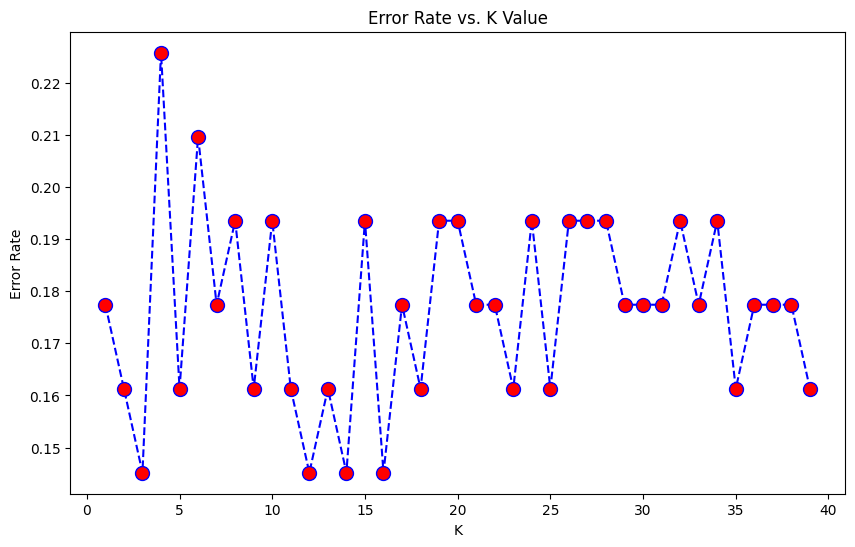

In [87]:
ErrorRate(X_train,y_train,X_test,y_test)

In [88]:
knn3_model2C = KNeighborsClassifier(n_neighbors=3)
knn3_model2C.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [89]:
y_pred_3 = knn3_model2C.predict(X_test)
print("# Accuracy on training set: {:.3f}".format(knn3_model2C.score(X_train, y_train)))
print("# Accuracy on test set: {:.3f}".format(knn3_model2C.score(X_test, y_test)))
print("# Confusion Matrix\n", confusion_matrix(y_test, y_pred_3))
print("# Classification Report\n", classification_report(y_test, y_pred_3))

# Accuracy on training set: 0.911
# Accuracy on test set: 0.855
# Confusion Matrix
 [[38  6]
 [ 3 15]]
# Classification Report
               precision    recall  f1-score   support

    Abnormal       0.93      0.86      0.89        44
      Normal       0.71      0.83      0.77        18

    accuracy                           0.85        62
   macro avg       0.82      0.85      0.83        62
weighted avg       0.87      0.85      0.86        62



# Training k-NN on the dataset with 3 Classes

In [90]:
ortho3C_dataset = pd.read_csv('/content/column_3C_weka.csv')

In [91]:
ortho3C_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [92]:
ortho3C_dataset.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [93]:
X3C = ortho3C_dataset.drop(['class'], axis=1)
y3C = ortho3C_dataset['class']

X3C_train, X3C_test, y3C_train, y3C_test = train_test_split(X3C, y3C, test_size=0.2, random_state=42)
print(X3C_train.shape)
print(X3C_test.shape)
print(y3C_train.shape)
print(y3C_test.shape)

(248, 6)
(62, 6)
(248,)
(62,)


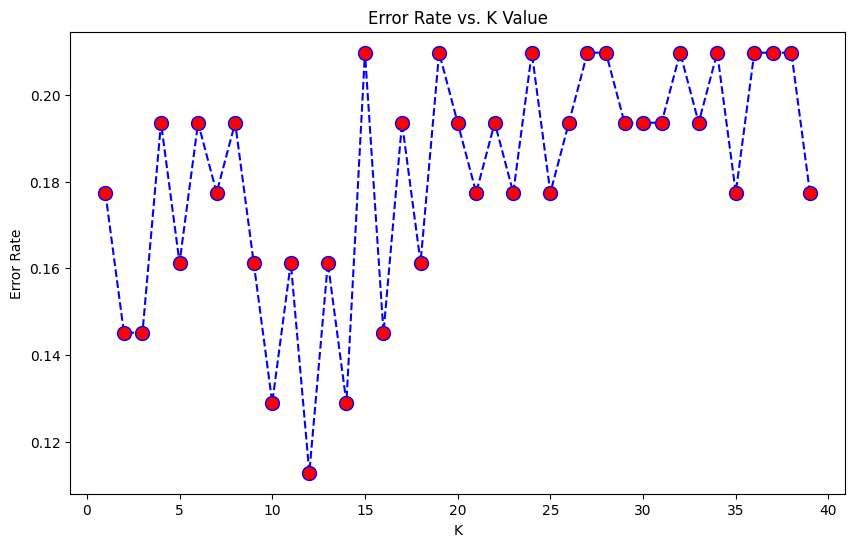

In [94]:
ErrorRate(X3C_train,y3C_train,X3C_test,y3C_test)

In [95]:
knn12_model3C = KNeighborsClassifier(n_neighbors=12)
knn12_model3C.fit(X3C_train, y3C_train)

KNeighborsClassifier(n_neighbors=12)

In [96]:
y3C_pred_12 = knn12_model3C.predict(X3C_test)
print("# Accuracy on training set: {:.3f}".format(knn12_model3C.score(X3C_train, y3C_train)))
print("# Accuracy on test set: {:.3f}".format(knn12_model3C.score(X3C_test, y3C_test)))
print("# Confusion Matrix\n", confusion_matrix(y3C_test, y3C_pred_12))
print("# Classification Report\n", classification_report(y3C_test, y3C_pred_12))

# Accuracy on training set: 0.867
# Accuracy on test set: 0.887
# Confusion Matrix
 [[ 9  3  0]
 [ 4 14  0]
 [ 0  0 32]]
# Classification Report
                    precision    recall  f1-score   support

           Hernia       0.69      0.75      0.72        12
           Normal       0.82      0.78      0.80        18
Spondylolisthesis       1.00      1.00      1.00        32

         accuracy                           0.89        62
        macro avg       0.84      0.84      0.84        62
     weighted avg       0.89      0.89      0.89        62



In [97]:
# Define the data with 3 from each class
data = [
    [26.14792141, 10.75945357, 14, 15.38846783, 125.2032956, -10.09310817, "Hernia"],
    [35.49244617, 11.7016723, 15.59036345, 23.79077387, 106.9388517, -3.460357991, "Hernia"],
    [74.43359316, 41.55733141, 27.7, 32.87626175, 107.9493045, 5.000088788, "Hernia"],
    [55.512212, 20.09515673, 43.99999999, 35.41705528, 122.648753, 34.55294641, "Spondylolisthesis"],
    [67.41253785, 17.44279712, 60.14464036, 49.96974073, 111.12397, 33.15764573, "Spondylolisthesis"],
    [73.63596236, 9.711317947, 62.99999999, 63.92464442, 98.72792982, 26.97578722, "Spondylolisthesis"],
    [54.9509702, 5.865353416, 52.99999999, 49.08561678, 126.9703283, -0.631602951, "Normal"],
    [40.6832291, 9.148437195, 31.02159252, 31.53479191, 139.1184721, -2.511618596, "Normal"],
    [47.31964755, 8.573680295, 35.56025198, 38.74596726, 120.5769719, 1.630663508, "Normal"]
]

# Create the DataFrame
test_df = pd.DataFrame(data, columns=ortho3C_dataset.columns.tolist())
test_df_features = test_df.drop(['class'], axis=1)
test_df_class = test_df['class']
test_df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,26.147921,10.759454,14.000000,15.388468,125.203296,-10.093108,Hernia
1,35.492446,11.701672,15.590363,23.790774,106.938852,-3.460358,Hernia
2,74.433593,41.557331,27.700000,32.876262,107.949304,5.000089,Hernia
3,55.512212,20.095157,44.000000,35.417055,122.648753,34.552946,Spondylolisthesis
4,67.412538,17.442797,60.144640,49.969741,111.123970,33.157646,Spondylolisthesis
5,73.635962,9.711318,63.000000,63.924644,98.727930,26.975787,Spondylolisthesis
6,54.950970,5.865353,53.000000,49.085617,126.970328,-0.631603,Normal
7,40.683229,9.148437,31.021593,31.534792,139.118472,-2.511619,Normal
8,47.319648,8.573680,35.560252,38.745967,120.576972,1.630664,Normal


In [98]:
y_pred_test3C = knn12_model3C.predict(test_df_features)
y_pred_test2C = knn3_model2C.predict(test_df_features)

In [101]:
columns = ['Actual', 'Predicted3C', 'Predicted2C']
results_df = pd.DataFrame(columns=columns)
results_df['Actual'] = test_df_class
results_df['Predicted3C'] = y_pred_test3C
results_df['Predicted2C'] = y_pred_test2C
results_df

,Actual,Predicted3C,Predicted2C
0,Hernia,Hernia,Abnormal
1,Hernia,Hernia,Abnormal
2,Hernia,Hernia,Abnormal
3,Spondylolisthesis,Spondylolisthesis,Abnormal
4,Spondylolisthesis,Spondylolisthesis,Abnormal
5,Spondylolisthesis,Spondylolisthesis,Abnormal
6,Normal,Normal,Normal
7,Normal,Normal,Normal
8,Normal,Normal,Normal


# Standardization for features to compare performance

In [102]:
from sklearn.preprocessing import StandardScaler

# Standardize
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X3C)

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(scaled_features, y3C, test_size=0.2, random_state=42)

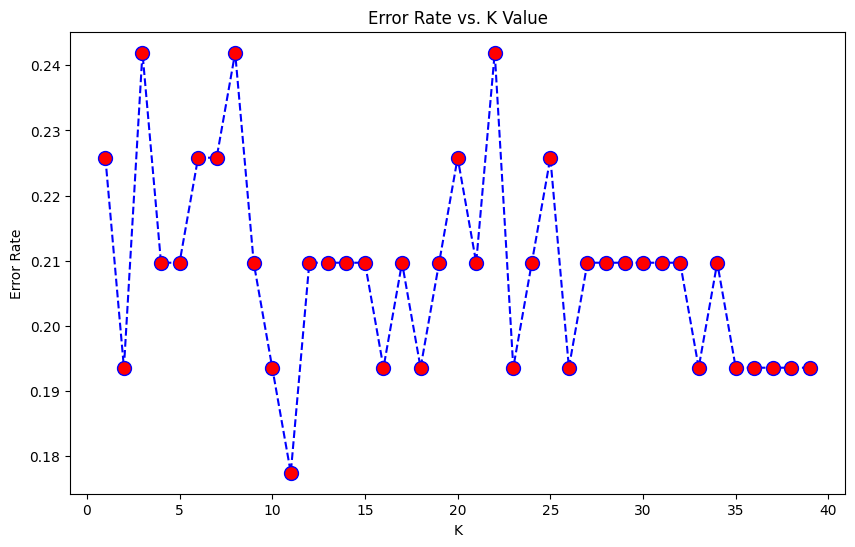

In [103]:
ErrorRate(X_train_scaled,y_train_scaled,X_test_scaled,y_test_scaled)

In [104]:
knn11_model3C_scaled = KNeighborsClassifier(n_neighbors=11)
knn11_model3C_scaled.fit(X_train_scaled, y_train_scaled)

KNeighborsClassifier(n_neighbors=11)

In [105]:
y_pred_11_scaled = knn11_model3C_scaled.predict(X_test_scaled)

In [107]:
columns = ["Actual", "Predicted"]
results_df_scaled = pd.DataFrame(columns=columns)
results_df_scaled["Actual"] = y_test_scaled
results_df_scaled["Predicted"] = y_pred_11_scaled
results_df_scaled.sort_index(inplace=True)
results_df_scaled

,Actual,Predicted
3,Hernia,Hernia
5,Hernia,Normal
7,Hernia,Hernia
9,Hernia,Spondylolisthesis
17,Hernia,Normal
...,...,...
290,Normal,Hernia
296,Normal,Normal
298,Normal,Normal
302,Normal,Hernia


In [122]:
print("# Accuracy on training set: {:.3f}".format(knn11_model3C_scaled.score(X_train_scaled, y_train_scaled)))
print("# Accuracy on test set: {:.3f}".format(knn11_model3C_scaled.score(X_test_scaled, y_test_scaled)))
print("# Confusion Matrix\n", confusion_matrix(y_test_scaled, y_pred_11_scaled))
print("# Classification Report\n", classification_report(y_test_scaled, y_pred_11_scaled))

# Accuracy on training set: 0.827
# Accuracy on test set: 0.823
# Confusion Matrix
 [[ 9  2  1]
 [ 5 12  1]
 [ 1  1 30]]
# Classification Report
                    precision    recall  f1-score   support

           Hernia       0.60      0.75      0.67        12
           Normal       0.80      0.67      0.73        18
Spondylolisthesis       0.94      0.94      0.94        32

         accuracy                           0.82        62
        macro avg       0.78      0.78      0.78        62
     weighted avg       0.83      0.82      0.82        62



# Testing Logistic Regression to compare performance on 2 Classe

In [110]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [116]:
y_pred_logistic_reg = log_model.predict(X_test)
y_pred_logistic_reg

array(['Normal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Normal', 'Normal', 'Normal', 'Abnormal',
       'Normal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Normal', 'Normal', 'Normal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Normal', 'Abnormal', 'Abnormal', 'Abnormal', 'Normal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Normal', 'Normal', 'Abnormal', 'Normal', 'Normal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Normal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Normal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Normal', 'Abnormal'], dtype=object)

In [119]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred_logistic_reg)
print("Precision:", precision)

Precision: 0.826797385620915


In [123]:
logistic_df = pd.DataFrame(columns=columns)
logistic_df["Actual"] = y_test
logistic_df["Predicted"] = y_pred_logistic_reg
logistic_df.sort_index(inplace=True)
logistic_df

,Actual,Predicted
3,Abnormal,Abnormal
5,Abnormal,Normal
7,Abnormal,Normal
9,Abnormal,Abnormal
17,Abnormal,Normal
...,...,...
290,Normal,Abnormal
296,Normal,Normal
298,Normal,Normal
302,Normal,Abnormal


In [130]:
correct_preds = (logistic_df["Actual"]==logistic_df["Predicted"]).sum()
print("# Correct predictions {} vs total {}.".format(correct_preds, len(logistic_df)))
print("# Accuracy for logistic regression model {:.3f}".format(correct_preds/len(logistic_df)))
print("# Accuracy for k-NN model(2C) {:.3f}".format(knn3_model2C.score(X_test, y_test)))

# Correct predictions 53 vs total 62.
# Accuracy for logistic regression model 0.855
# Accuracy for k-NN model(2C) 0.855
